In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1️⃣ Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="pass123",
    database="task7_db"
)

In [3]:
# 2️⃣ Run an SQL query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""

In [4]:
# 3️⃣ Read SQL result into pandas DataFrame
df = pd.read_sql(query, conn)

print("\nSales summary by product:")
print(df.to_string(index=False))



Sales summary by product:
 product  total_qty  revenue
Notebook       15.0     37.5
     Pen       70.0     35.0
  Pencil       30.0      7.5


C:\Users\sourb\AppData\Local\Temp\ipykernel_11424\3316388167.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


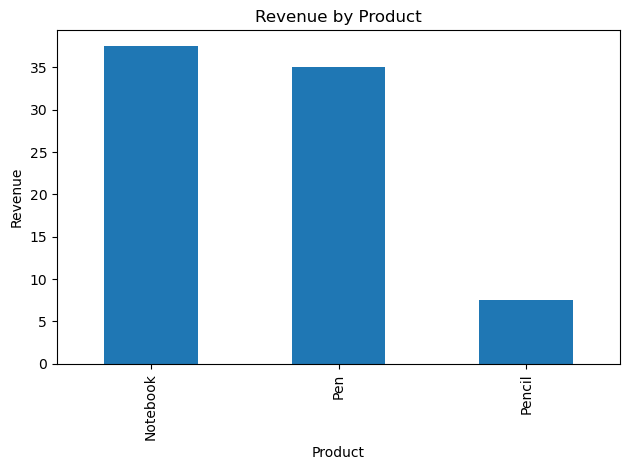

In [5]:
# 4️⃣ Plot a bar chart
ax = df.plot(kind="bar", x="product", y="revenue", legend=False)
ax.set_title("Revenue by Product")
ax.set_xlabel("Product")
ax.set_ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart_mysql.png")
plt.show()

In [6]:
# 5️⃣ Close the connection
conn.close()